# 代码配置

# *Docker*


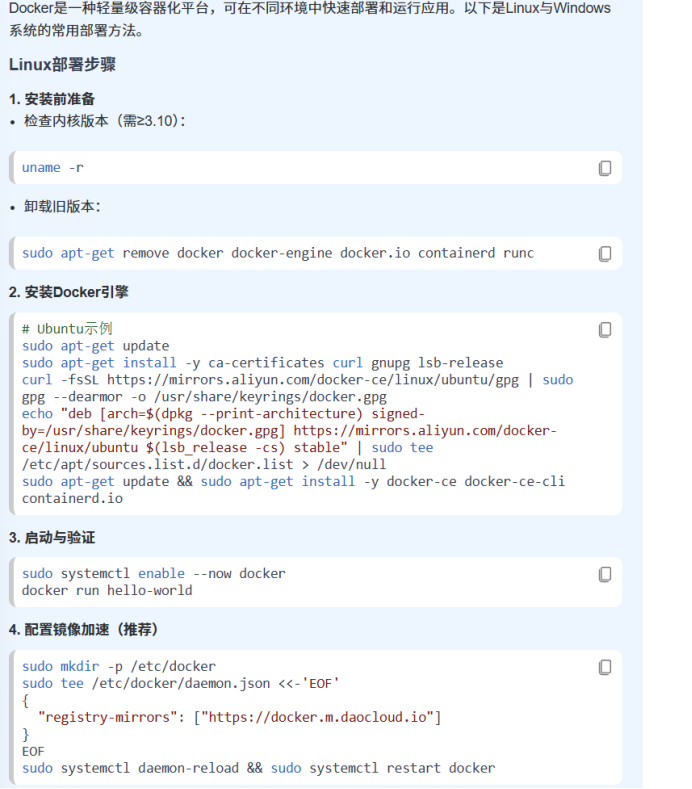

以下是适配 Markdown 格式的 Docker 常用命令速查表（优化排版+保留核心信息，适配 WSL/Linux 场景）：

## Docker 常用命令速查表（WSL/Linux 通用）
### 一、Docker 服务管理（WSL 核心操作）
| 命令 | 作用 | 备注 |
|------|------|------|
| `sudo systemctl start docker` | 启动 Docker 服务 | WSL 中需手动启动，默认重启后不自动运行 |
| `sudo systemctl stop docker` | 停止 Docker 服务 | 停止后容器会中断运行 |
| `sudo systemctl restart docker` | 重启 Docker 服务 | 适用于配置修改后生效 |
| `sudo systemctl status docker` | 查看 Docker 服务状态 | 显示“active (running)”即为正常运行 |
| `sudo systemctl enable docker` | 尝试设置开机自启 | WSL 中需配合 `.bashrc` 配置才能真正生效 |

### 二、镜像（Image）管理
| 命令 | 作用 | 示例 |
|------|------|------|
| `docker images` | 列出本地所有镜像 | 显示镜像 ID、名称、版本、大小等信息 |
| `docker pull [镜像名:版本]` | 从 Docker Hub 拉取镜像 | `docker pull python:3.10` |
| `docker rmi [镜像ID/镜像名]` | 删除指定镜像 | 需先删除依赖该镜像的容器，或加 `-f` 强制删除 |
| `docker build -t [镜像名:版本] [路径]` | 从 Dockerfile 构建镜像 | `docker build -t myapp:v1 .` |
| `docker save -o [文件名.tar] [镜像名]` | 导出镜像到本地文件 | `docker save -o python310.tar python:3.10` |
| `docker load -i [镜像文件.tar]` | 导入本地镜像文件 | `docker load -i python310.tar` |
| `docker search [关键词]` | 搜索 Docker Hub 镜像 | `docker search nginx` |

### 三、容器（Container）管理
| 命令 | 作用 | 关键参数说明 |
|------|------|--------------|
| `docker run [参数] [镜像名]` | 创建并启动容器 | 核心参数：<br>- `-d`：后台运行<br>- `-p 主机端口:容器端口`：端口映射<br>- `-v 主机路径:容器路径`：目录挂载<br>- `--name 容器名`：自定义名称<br>示例：`docker run -d -p 8080:80 --name mynginx nginx` |
| `docker ps` | 列出运行中的容器 | 仅显示活跃容器 |
| `docker ps -a` | 列出所有容器 | 包括已停止的容器 |
| `docker start [容器ID/名称]` | 启动已停止的容器 | 示例：`docker start mynginx` |
| `docker stop [容器ID/名称]` | 停止运行中的容器 | 优雅停止，需等待进程退出 |
| `docker restart [容器ID/名称]` | 重启容器 | 等同于“停止+启动” |
| `docker rm [容器ID/名称]` | 删除指定容器 | 需先停止容器，或加 `-f` 强制删除运行中容器 |
| `docker exec -it [容器ID/名称] /bin/bash` | 进入容器交互式终端 | `-it`：保持终端交互，支持命令输入 |
| `docker logs [容器ID/名称]` | 查看容器日志 | 加 `-f` 实时跟踪日志，示例：`docker logs -f myapp` |
| `docker inspect [容器ID/镜像名]` | 查看详细信息 | 显示网络、挂载、环境变量等配置 |

### 四、其他高频操作
| 命令 | 作用 | 注意事项 |
|------|------|----------|
| `docker info` | 查看 Docker 系统信息 | 包括镜像数、容器数、存储驱动等 |
| `docker version` | 查看 Docker 版本 | 显示 Client（客户端）和 Server（服务端）版本 |
| `docker system prune` | 清理无用资源 | 会删除未使用的镜像、容器、网络，谨慎执行！ |
| `docker compose up -d` | 启动 Compose 服务 | 基于 `docker-compose.yml` 配置，`-d` 后台运行 |
| `docker compose down` | 停止 Compose 服务 | 同时删除容器和网络，保留镜像 |

### 五、WSL 场景适配说明
#### 1. 权限问题
执行 docker 命令提示“权限不足”时，执行以下命令，重启终端后可免 `sudo` 使用：
```bash
sudo usermod -aG docker $USER
```

#### 2. 目录挂载
需使用 WSL 格式路径（Windows 路径需转换）：
- Windows 路径示例：`F:\code`
- WSL 对应路径：`/mnt/f/code`
- 挂载示例：`docker run -v /mnt/f/code:/app python:3.10`

#### 3. 端口访问
容器端口映射后（如 `-p 8080:80`），Windows 端可直接通过 `localhost:8080` 访问容器服务。

#### 4. 开机自启
在 `~/.bashrc` 末尾添加以下内容，实现 WSL 重启后自动启动 Docker：
```bash
if ! systemctl is-active --quiet docker; then
  sudo systemctl start docker
fi
```
添加后执行 `source ~/.bashrc` 生效。

## 六、基于容器编写/运行自定义python文件

### 1、临时编写测试
适合写几行代码测试，不需要把文件同步到主机

- 步骤一：启动容器进入交互式终端

关键：--entrypoint /bin/bash 覆盖默认的 "python main.py"，进入终端 

```bash
docker run -it --rm -e HF_ENDPOINT=https://hf-mirror.com --name ragprac1 vector-database-tutorial-vector-tutorial /bin/bash
```

- 步骤二：在容器内编写Py文件
  
用容器的编辑器Nano编写自定义脚本，没有的话用sudo apt install下载。
```bash
# 方法 1：用 nano 编辑（简单易操作），注意路径时/app/xxx，这个是程序执行的路径
nano /app/my_test.py

# 方法 2：用 vim 编辑（熟悉 vim 的话）
vim /app/my_test.py

```

- 步骤三：写入自定义代码

```python
# /app/my_test.py
from sentence_transformers import SentenceTransformer
import numpy as np

# 加载容器内已下载的模型（无需重新下载）
model = SentenceTransformer('all-MiniLM-L6-v2')

# 自定义文本 embedding
texts = ["Docker 容器里运行 Python 真方便！", "Sentence Transformers 太好用了"]
embeddings = model.encode(texts)

# 输出结果
print("Embedding 形状：", embeddings.shape)
print("第一个文本的前 10 维：", embeddings[0][:10])
print("两个文本的余弦相似度：", np.dot(embeddings[0], embeddings[1])/(np.linalg.norm(embeddings[0])*np.linalg.norm(embeddings[1])))

```

按 Ctrl+O 保存（nano）→ 按回车确认文件名 → 按 Ctrl+X 退出 nano

- 步骤四：运行自定义Py文件

```bash
python /app/my_test.py

```

- 步骤五：退出容器：exit，由于-rm参数，容器会自动删除

### 2.重点：主机编写Py文件，挂载到容器允许(推荐，持久化)
*适合编写复杂脚本，文件保存在主机（容器删除后代码不丢失），核心是用 -v 挂载主机目录到容器：*

- 步骤 1：主机新建目录存放自定义脚本


```bash
# 在主机任意位置新建目录（比如你的项目目录下）
mkdir -p /mnt/f/git/repository/temp1/vector-database-tutorial/my_scripts
```

- 步骤 2：主机编写自定义 Py 文件
用主机的编辑器（VS Code / 记事本）在 my_scripts 目录下新建 my_rag_test.py

- 步骤 3：运行容器并挂载主机目录

```bash
docker run -it --rm \
  -e HF_ENDPOINT=https://hf-mirror.com \
  -v /mnt/f/git/repository/temp1/vector-database-tutorial/my_scripts:/app/my_scripts \
  --name ragprac1 \
  vector-database-tutorial-vector-tutorial /bin/bash
-v 主机目录:容器目录：把主机的 my_scripts 挂载到容器的 /app/my_scripts，主机修改文件，容器内实时同步。
```

步骤 4：在容器内运行自定义脚本


```bash
# 进入容器终端后，运行挂载的脚本
python /app/my_scripts/my_rag_test.py
输出结果：
plaintext
```

### 场景 3：覆盖默认教程脚本，直接运行自定义文件
如果想跳过教程，直接运行你的自定义脚本（替代默认的 main.py），只需在 docker run 末尾指定脚本路径：


```bash
# 直接运行主机挂载的自定义脚本（无需进入容器终端）
docker run -it --rm \
  -e HF_ENDPOINT=https://hf-mirror.com \
  -v /mnt/f/git/repository/temp1/vector-database-tutorial/my_scripts:/app/my_scripts \
  vector-database-tutorial-vector-tutorial \
  python /app/my_scripts/my_rag_test.py```
执行后会直接输出脚本结果，无需手动选教程模块。


